In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind


In [3]:
# File to Load
diabetes_dataset_to_load = "Resources/diabetes_prediction_dataset.csv"

# Read the Diabetes Data File
diabetes_df = pd.read_csv(diabetes_dataset_to_load)
untouched_df = diabetes_df

In [4]:
diabetes_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [5]:
# Display the data table for preview
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
# Raw Data
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
# check for null values
diabetes_df.dropna(how='any', axis=0)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [8]:
diabetes_df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [9]:
male_df = diabetes_df[diabetes_df['gender']=='Male']
female_df = diabetes_df[diabetes_df['gender']=='Female']
other_df = diabetes_df[diabetes_df['gender']=='Other']

# male_df
female_df
# other_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# Summary statistics for each variable

In [10]:
statistical_var = ['age','bmi','HbA1c_level','blood_glucose_level']

column_var = ['gender','hypertension', 'heart_disease','smoking_history','diabetes']

In [11]:
diabetes_df[statistical_var].describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,27.320767,5.527507,138.058060
std,22.516840,6.636783,1.070672,40.708136
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.630000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


In [12]:
diabetes_df[column_var].describe()

,hypertension,heart_disease,diabetes
count,100000.00000,100000.000000,100000.000000
mean,0.07485,0.039420,0.085000
std,0.26315,0.194593,0.278883
min,0.00000,0.000000,0.000000
25%,0.00000,0.000000,0.000000
50%,0.00000,0.000000,0.000000
75%,0.00000,0.000000,0.000000
max,1.00000,1.000000,1.000000


In [13]:
mean = diabetes_df.groupby(['bmi'])['age'].mean()
median = diabetes_df.groupby(['bmi'])['age'].median()
var = diabetes_df.groupby(['bmi'])['age'].var()
std = diabetes_df.groupby(['bmi'])['age'].std()
sem = diabetes_df.groupby(['bmi'])['age'].sem()

bmi_age_df = pd.DataFrame({'Mean Age':mean, 'Median Age ':median, 'Age Variance':var, 'Age Std.Dev':std, 'Age Std Err':sem})

bmi_age_df 

,Mean Age,Median Age,Age Variance,Age Std.Dev,Age Std Err
bmi,,,,,
10.01,44.00,44.00,2592.0,50.911688,36.0
10.08,38.00,38.00,NaN,NaN,NaN
10.14,11.00,11.00,NaN,NaN,NaN
10.19,39.00,39.00,NaN,NaN,NaN
10.21,0.48,0.48,NaN,NaN,NaN
...,...,...,...,...,...
88.72,45.00,45.00,NaN,NaN,NaN
88.76,80.00,80.00,NaN,NaN,NaN
91.82,38.00,38.00,NaN,NaN,NaN


# plotting variables to see the relationship

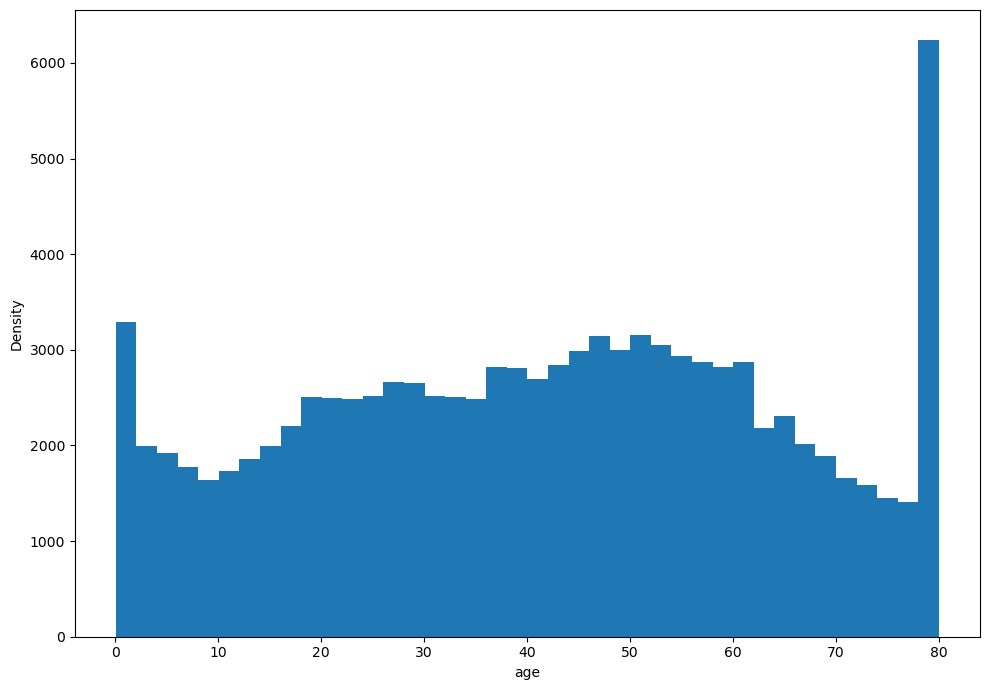

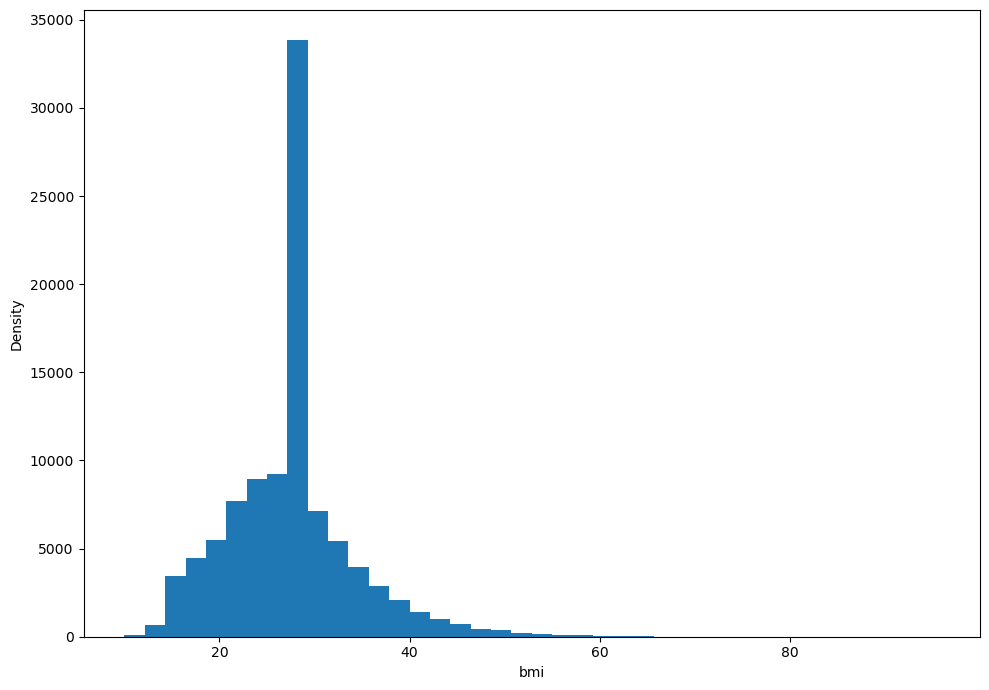

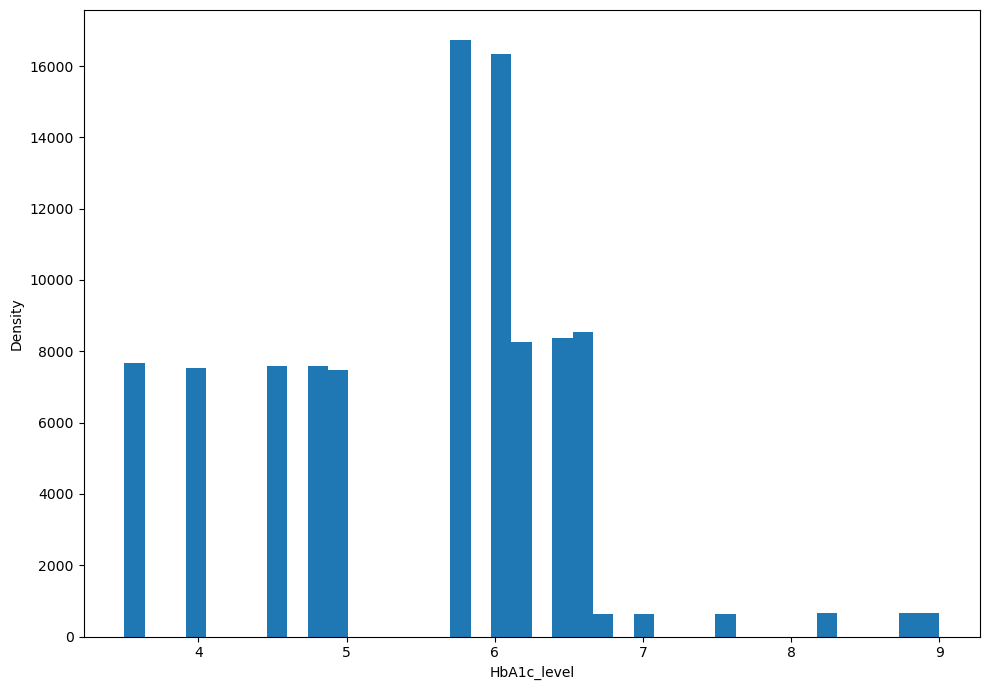

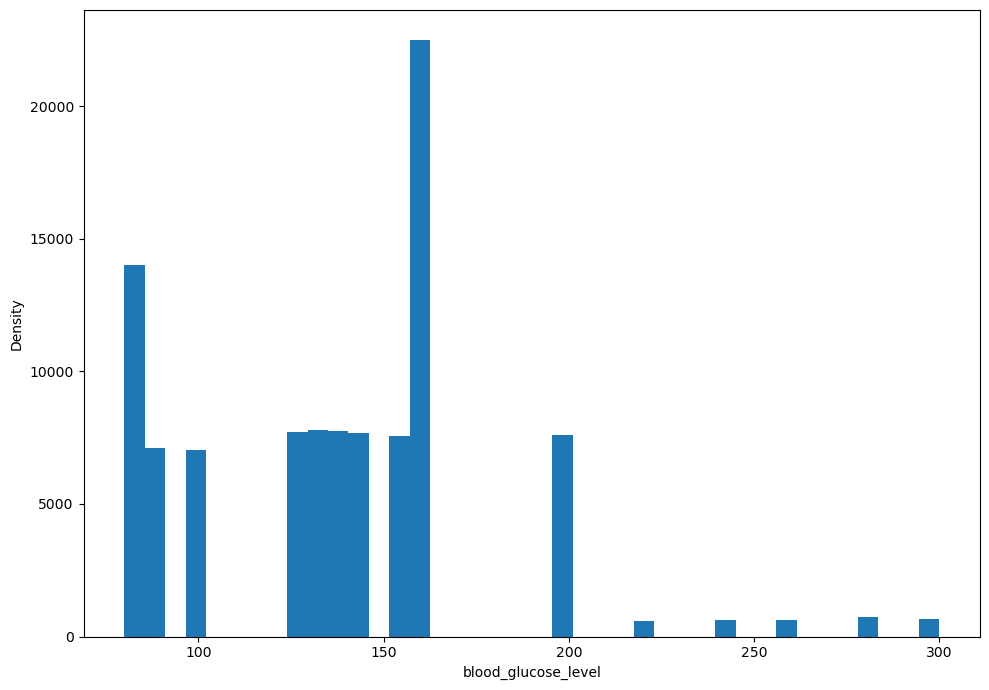

In [14]:
# histogram showing density 
for i in statistical_var:
    plt.figure(figsize=(10,7))
    plt.hist(diabetes_df[i],bins=40)
    plt.xlabel(i)
    plt.ylabel('Density')
    
    plt.tight_layout()
    plt.show()

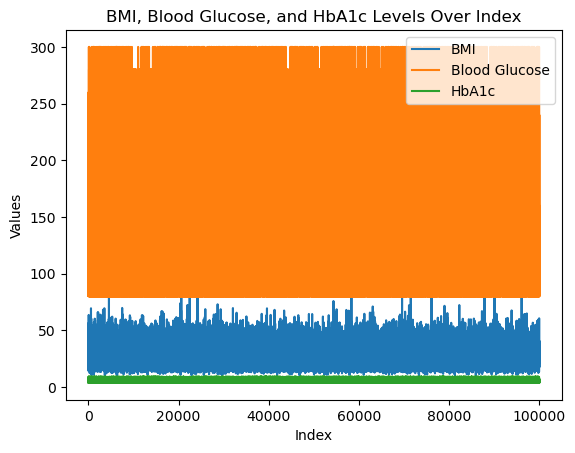

In [15]:
# Extract x-axis values (e.g., index)
x = diabetes_df.index

# Extract y-axis values (BMI, Blood Glucose, and HbA1c levels)
bmi = diabetes_df['bmi']
blood_glucose = diabetes_df['blood_glucose_level']
hba1c = diabetes_df['HbA1c_level']

# Stacked line chart comparing BMI, Blood Glucose, and HbA1c levels
plt.plot(x, bmi, label='BMI')
plt.plot(x, blood_glucose, label='Blood Glucose')
plt.plot(x, hba1c, label='HbA1c')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('BMI, Blood Glucose, and HbA1c Levels Over Index')

# Add legend
plt.legend()

# Show the plot
plt.show()

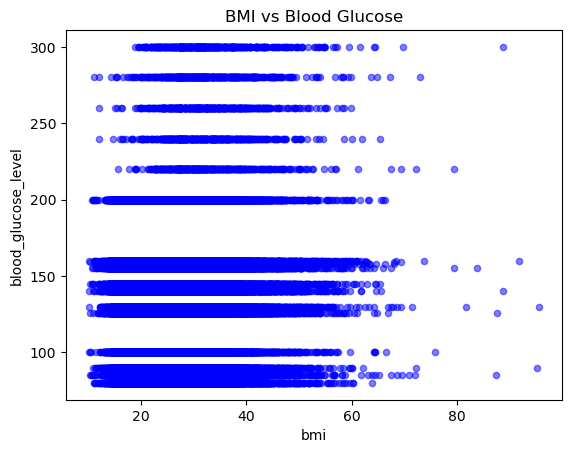

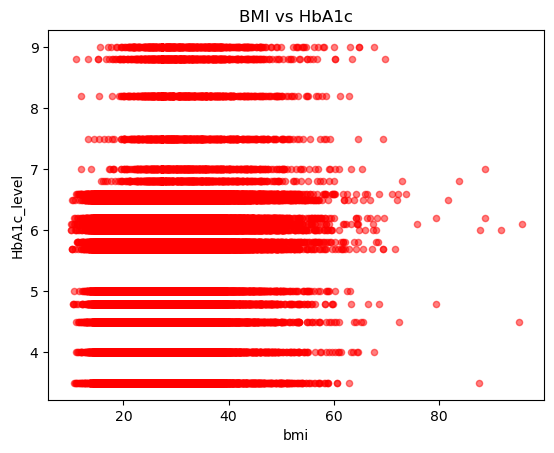

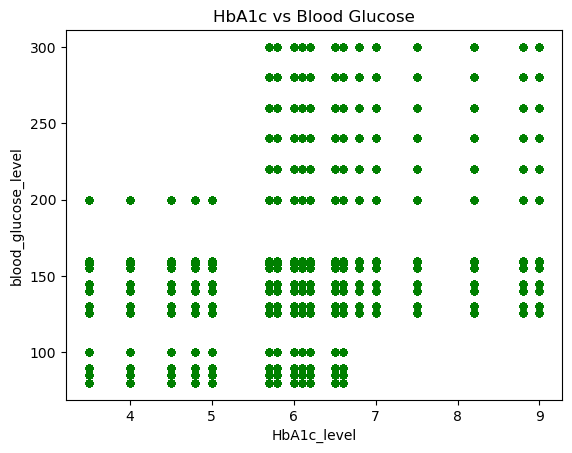

In [16]:
# Scatter plot comparing BMI to Blood Glucose
diabetes_df.plot(kind='scatter', x='bmi', y='blood_glucose_level', color='blue', alpha=0.5, title='BMI vs Blood Glucose')

# Scatter plot comparing BMI to HbA1c
diabetes_df.plot(kind='scatter', x='bmi', y='HbA1c_level', color='red', alpha=0.5, title='BMI vs HbA1c')

# Scatter plot comparing HbA1c to Blood Glucose
diabetes_df.plot(kind='scatter', x='HbA1c_level', y='blood_glucose_level', color='green', alpha=0.5, title='HbA1c vs Blood Glucose')

# Show the plots
plt.show()

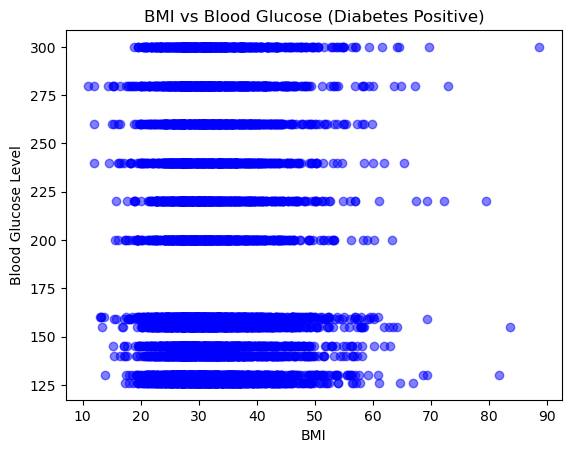

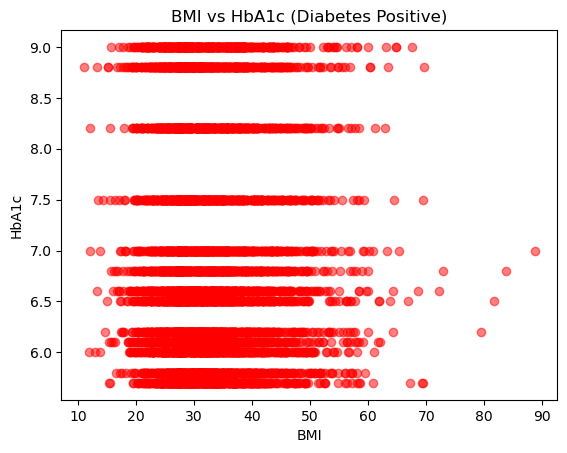

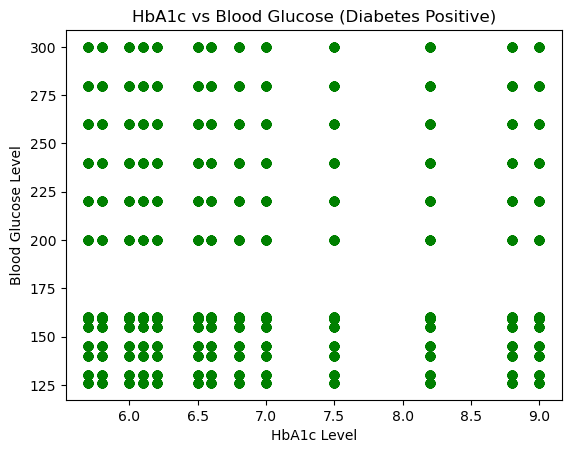

In [17]:
# Filter DataFrame to include only individuals diagnosed with diabetes
diabetes_positive_df = diabetes_df[diabetes_df['diabetes'] == 1]

# Scatter plot comparing BMI to Blood Glucose for individuals with diabetes
plt.scatter(diabetes_positive_df['bmi'], diabetes_positive_df['blood_glucose_level'], color='blue', alpha=0.5)
plt.title('BMI vs Blood Glucose (Diabetes Positive)')
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.show()

# Scatter plot comparing BMI to Blood Glucose for individuals with diabetes
plt.scatter(diabetes_positive_df['bmi'], diabetes_positive_df['HbA1c_level'], color='red', alpha=0.5)
plt.title('BMI vs HbA1c (Diabetes Positive)')
plt.xlabel('BMI')
plt.ylabel('HbA1c')
plt.show()

# Scatter plot comparing HbA1c to Blood Glucose for individuals with diabetes
plt.scatter(diabetes_positive_df['HbA1c_level'], diabetes_positive_df['blood_glucose_level'], color='green', alpha=0.5)
plt.title('HbA1c vs Blood Glucose (Diabetes Positive)')
plt.xlabel('HbA1c Level')
plt.ylabel('Blood Glucose Level')
plt.show()

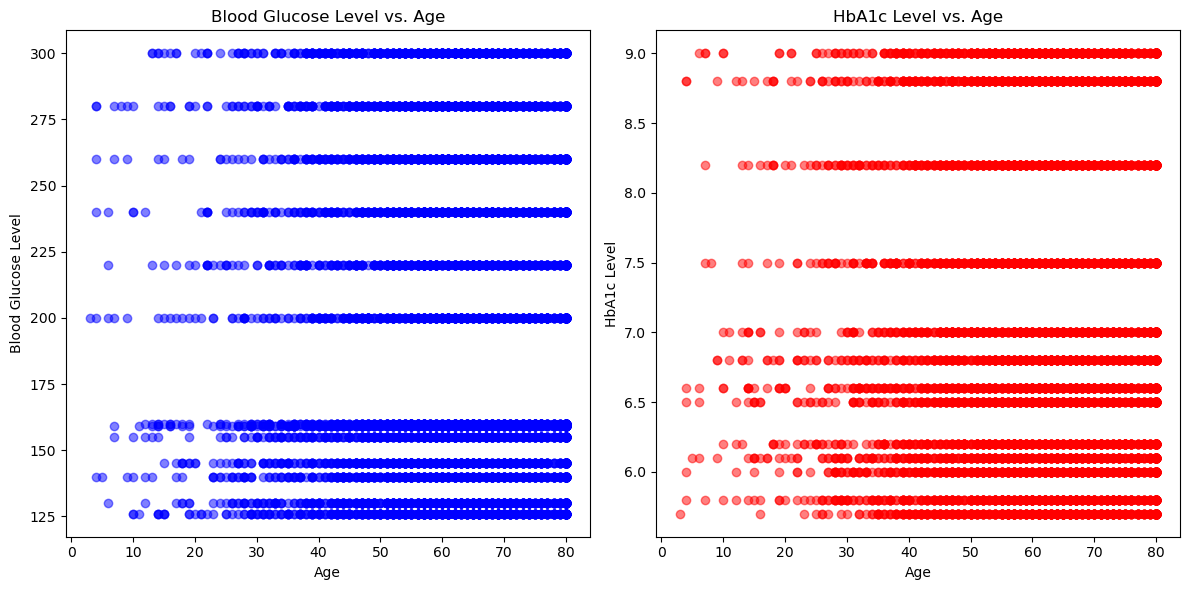

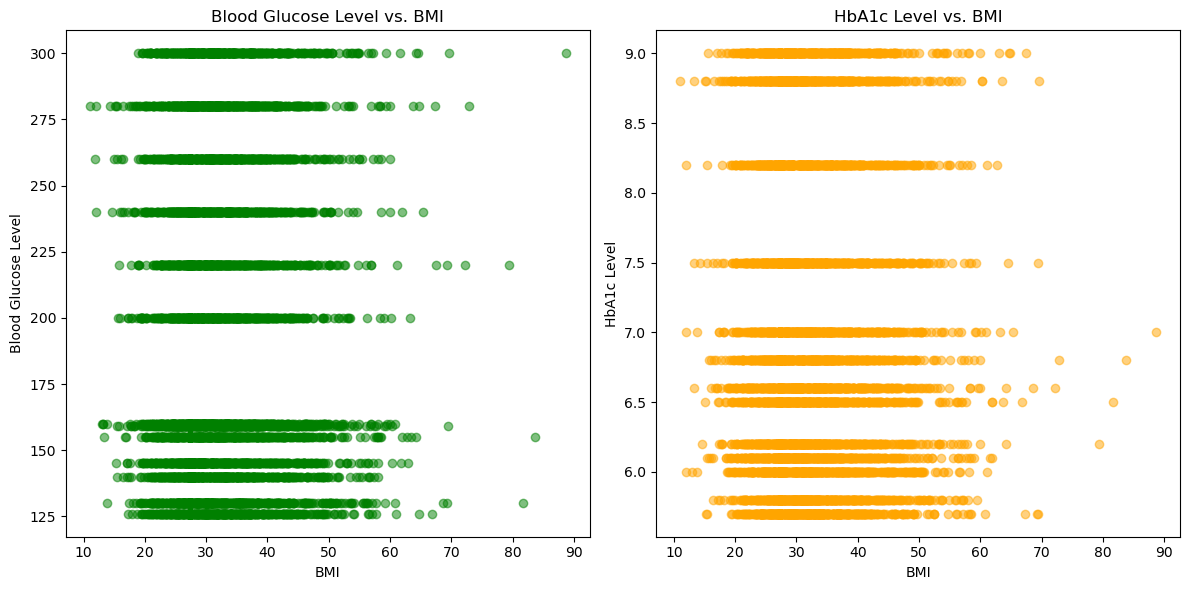

In [ ]:

# Filter DataFrame to include only individuals diagnosed with diabetes
diabetes_positive_df = diabetes_df[diabetes_df['diabetes'] == 1]

# Extract variables for plotting
age_data = diabetes_positive_df['age']
bmi_data = diabetes_positive_df['bmi']
blood_glucose_data = diabetes_positive_df['blood_glucose_level']
hba1c_data = diabetes_positive_df['HbA1c_level']

# Create subplots for blood glucose vs. age and HbA1c vs. age
plt.figure(figsize=(12, 6))

# Blood Glucose vs. Age
plt.subplot(1, 2, 1)
plt.scatter(age_data, blood_glucose_data, color='blue', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Blood Glucose Level')
plt.title('Blood Glucose Level vs. Age')

# HbA1c vs. Age
plt.subplot(1, 2, 2)
plt.scatter(age_data, hba1c_data, color='red', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('HbA1c Level')
plt.title('HbA1c Level vs. Age')

plt.tight_layout()
plt.show()

# Create subplots for blood glucose vs. BMI and HbA1c vs. BMI
plt.figure(figsize=(12, 6))

# Blood Glucose vs. BMI
plt.subplot(1, 2, 1)
plt.scatter(bmi_data, blood_glucose_data, color='green', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.title('Blood Glucose Level vs. BMI')

# HbA1c vs. BMI
plt.subplot(1, 2, 2)
plt.scatter(bmi_data, hba1c_data, color='orange', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('HbA1c Level')
plt.title('HbA1c Level vs. BMI')

plt.tight_layout()
plt.show()

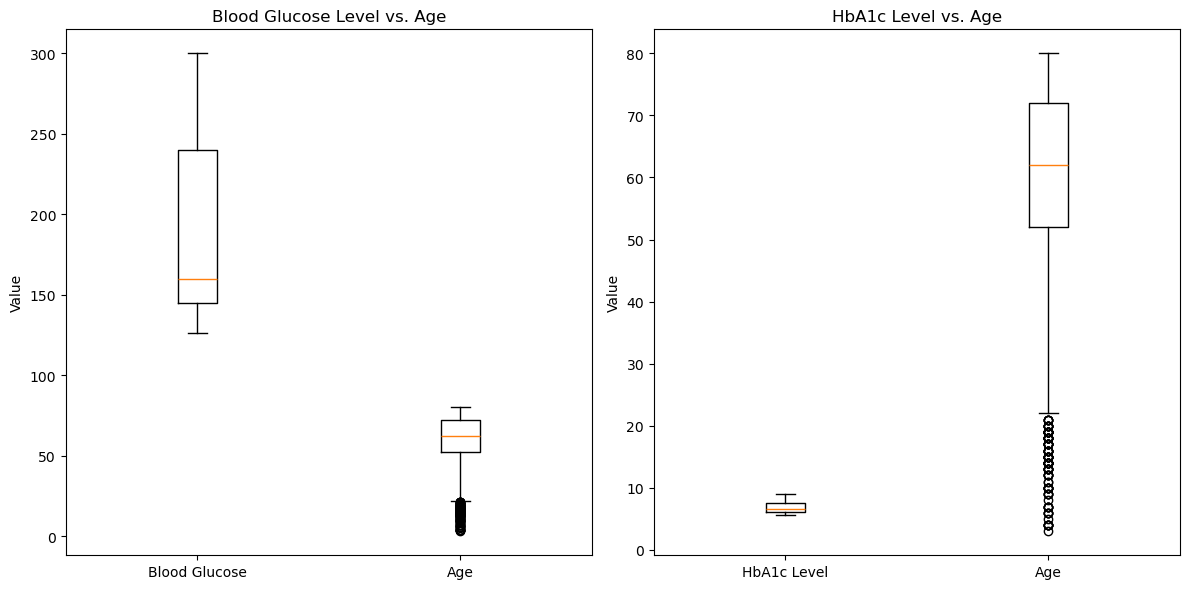

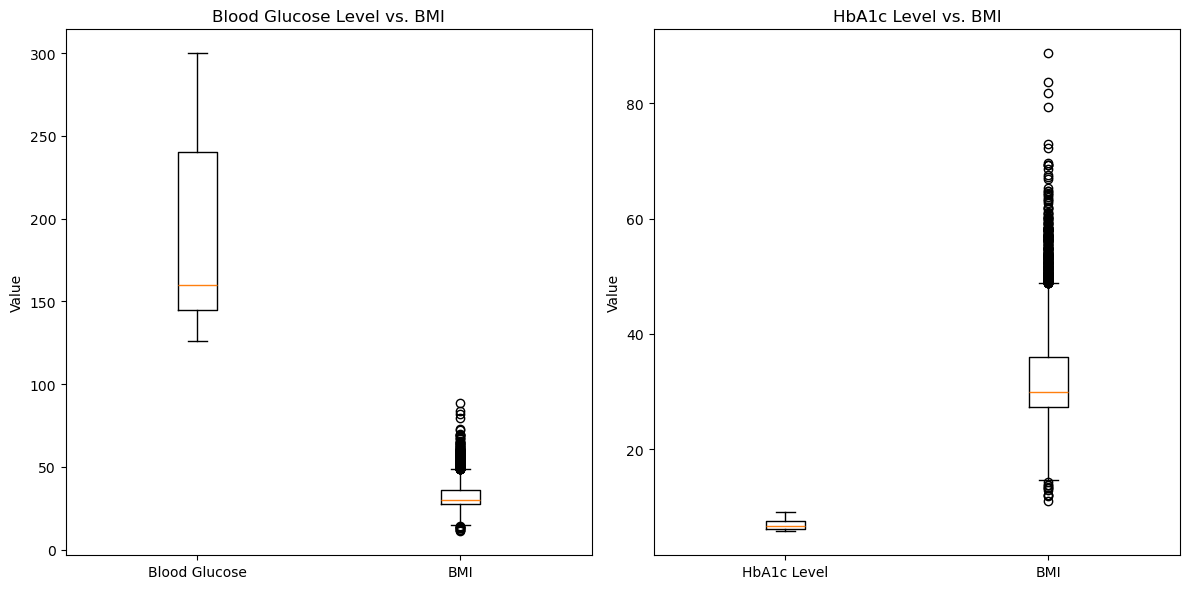

In [ ]:
# Filter DataFrame to include only individuals diagnosed with diabetes
diabetes_positive_df = diabetes_df[diabetes_df['diabetes'] == 1]

# Create subplots for blood glucose vs. age and HbA1c vs. age using box plots
plt.figure(figsize=(12, 6))

# Blood Glucose vs. Age
plt.subplot(1, 2, 1)
plt.boxplot([diabetes_positive_df['blood_glucose_level'], diabetes_positive_df['age']], labels=['Blood Glucose', 'Age'])
plt.title('Blood Glucose Level vs. Age')
plt.ylabel('Value')

# HbA1c vs. Age
plt.subplot(1, 2, 2)
plt.boxplot([diabetes_positive_df['HbA1c_level'], diabetes_positive_df['age']], labels=['HbA1c Level', 'Age'])
plt.title('HbA1c Level vs. Age')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

# Create subplots for blood glucose vs. BMI and HbA1c vs. BMI using box plots
plt.figure(figsize=(12, 6))

# Blood Glucose vs. BMI
plt.subplot(1, 2, 1)
plt.boxplot([diabetes_positive_df['blood_glucose_level'], diabetes_positive_df['bmi']], labels=['Blood Glucose', 'BMI'])
plt.title('Blood Glucose Level vs. BMI')
plt.ylabel('Value')

# HbA1c vs. BMI
plt.subplot(1, 2, 2)
plt.boxplot([diabetes_positive_df['HbA1c_level'], diabetes_positive_df['bmi']], labels=['HbA1c Level', 'BMI'])
plt.title('HbA1c Level vs. BMI')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


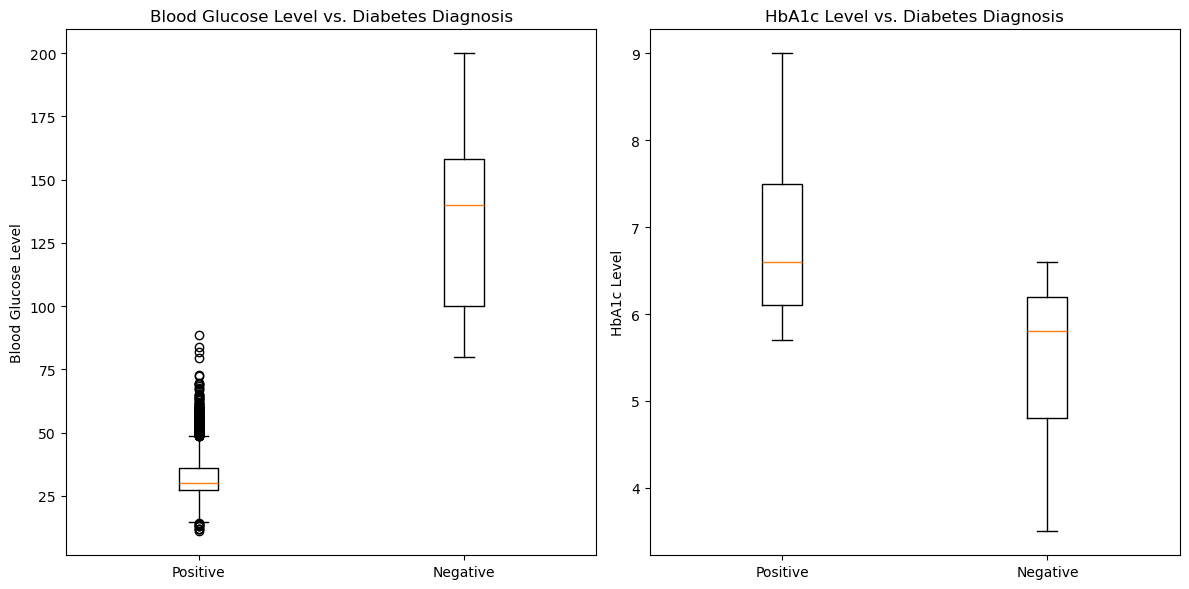

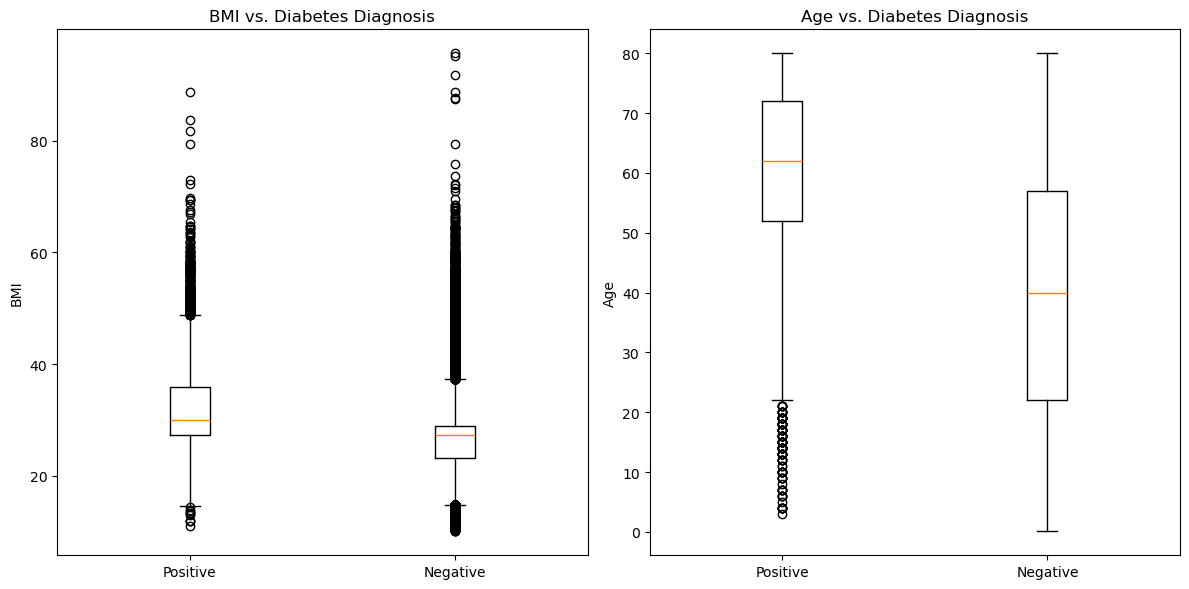

In [ ]:

# Create subplots for blood glucose vs. age and HbA1c vs. age using box plots
plt.figure(figsize=(12, 6))

# Blood Glucose vs. Age
plt.subplot(1, 2, 1)
plt.boxplot([diabetes_df[diabetes_df['diabetes'] == 1]['bmi'], diabetes_df[diabetes_df['diabetes'] == 0]['blood_glucose_level']], labels=['Positive', 'Negative'])
plt.title('Blood Glucose Level vs. Diabetes Diagnosis')
plt.ylabel('Blood Glucose Level')

# HbA1c vs. Age
plt.subplot(1, 2, 2)
plt.boxplot([diabetes_df[diabetes_df['diabetes'] == 1]['HbA1c_level'], diabetes_df[diabetes_df['diabetes'] == 0]['HbA1c_level']], labels=['Positive', 'Negative'])
plt.title('HbA1c Level vs. Diabetes Diagnosis')
plt.ylabel('HbA1c Level')

plt.tight_layout()
plt.show()

# Create subplots for blood glucose vs. BMI and HbA1c vs. BMI using box plots
plt.figure(figsize=(12, 6))

# Blood Glucose vs. BMI
plt.subplot(1, 2, 1)
plt.boxplot([diabetes_df[diabetes_df['diabetes'] == 1]['bmi'], diabetes_df[diabetes_df['diabetes'] == 0]['bmi']], labels=['Positive', 'Negative'])
plt.title('BMI vs. Diabetes Diagnosis')
plt.ylabel('BMI')

# HbA1c vs. BMI
plt.subplot(1, 2, 2)
plt.boxplot([diabetes_df[diabetes_df['diabetes'] == 1]['age'], diabetes_df[diabetes_df['diabetes'] == 0]['age']], labels=['Positive', 'Negative'])
plt.title('Age vs. Diabetes Diagnosis')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

# Creating linear regressions and correlation coefficients for variables

In [18]:

# Filter DataFrame to include only individuals diagnosed with diabetes
diabetes_positive_df = diabetes_df[diabetes_df['diabetes'] == 1]

# Extract features (X) and target variable (y)
X = diabetes_positive_df[['bmi', 'HbA1c_level']]
y = diabetes_positive_df['blood_glucose_level']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Print the coefficients
print('Coefficients:', model.coef_)

# Print the intercept
print('Intercept:', model.intercept_)



Coefficients: [ 0.01606025 -0.52190212]
Intercept: 197.2003311040754


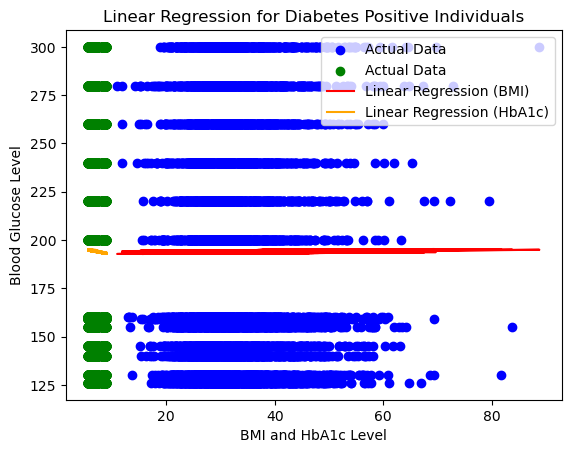

In [19]:
# Filter DataFrame to include only individuals diagnosed with diabetes
diabetes_positive_df = diabetes_df[diabetes_df['diabetes'] == 1]

# Extract features (X) and target variable (y)
X = diabetes_positive_df[['bmi', 'HbA1c_level']]
y = diabetes_positive_df['blood_glucose_level']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Plot the actual data
plt.scatter(diabetes_positive_df['bmi'], diabetes_positive_df['blood_glucose_level'], color='blue', label='Actual Data')
plt.scatter(diabetes_positive_df['HbA1c_level'], diabetes_positive_df['blood_glucose_level'], color='green', label='Actual Data')

# Plot the regression line
plt.plot(diabetes_positive_df['bmi'], model.predict(X), color='red', label='Linear Regression (BMI)')
plt.plot(diabetes_positive_df['HbA1c_level'], model.predict(X), color='orange', label='Linear Regression (HbA1c)')

# Set labels and title
plt.xlabel('BMI and HbA1c Level')
plt.ylabel('Blood Glucose Level')
plt.title('Linear Regression for Diabetes Positive Individuals')
plt.legend()

# Show the plot
plt.show()

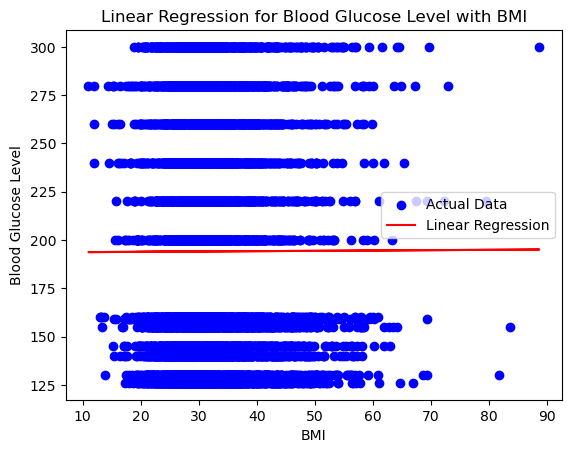

In [20]:
# Filter DataFrame to include only individuals diagnosed with diabetes
diabetes_positive_df = diabetes_df[diabetes_df['diabetes'] == 1]

# Extract features (X) and target variable (y)
X = diabetes_positive_df[['bmi']]
y = diabetes_positive_df['blood_glucose_level']  # Only one target variable for linear regression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Plot the actual data
plt.scatter(diabetes_positive_df['bmi'], diabetes_positive_df['blood_glucose_level'], color='blue', label='Actual Data')

# Plot the regression line
plt.plot(diabetes_positive_df['bmi'], model.predict(X), color='red', label='Linear Regression')

# Set labels and title
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.title('Linear Regression for Blood Glucose Level with BMI')

# Add legend
plt.legend()

# Show the plot
plt.show()

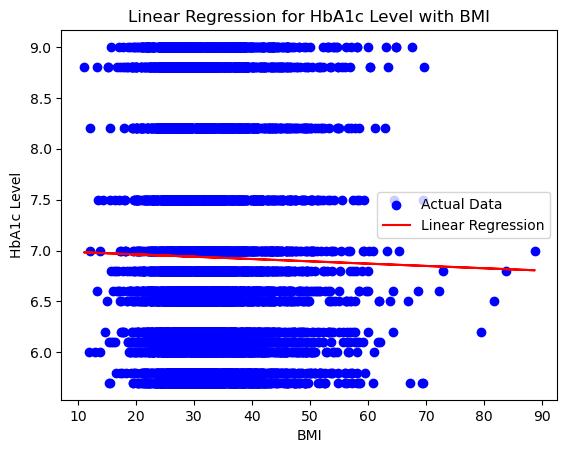

In [21]:
# Filter DataFrame to include only individuals diagnosed with diabetes
diabetes_positive_df = diabetes_df[diabetes_df['diabetes'] == 1]

# Extract features (X) and target variable (y)
X = diabetes_positive_df[['bmi']]
y = diabetes_positive_df['HbA1c_level']  # Only one target variable for linear regression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Plot the actual data
plt.scatter(diabetes_positive_df['bmi'], diabetes_positive_df['HbA1c_level'], color='blue', label='Actual Data')

# Plot the regression line
plt.plot(diabetes_positive_df['bmi'], model.predict(X), color='red', label='Linear Regression')

# Set labels and title
plt.xlabel('BMI')
plt.ylabel('HbA1c Level')
plt.title('Linear Regression for HbA1c Level with BMI')

# Add legend
plt.legend()

# Show the plot
plt.show()

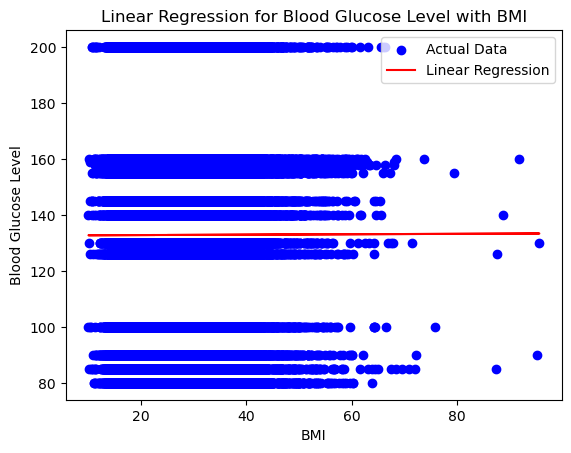

In [22]:
# Filter DataFrame to include only individuals who do not have diabetes
diabetes_negative_df = diabetes_df[diabetes_df['diabetes'] == 0]

# Extract features (X) and target variable (y)
X = diabetes_negative_df[['bmi']]
y = diabetes_negative_df['blood_glucose_level']  # Only one target variable for linear regression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Plot the actual data
plt.scatter(diabetes_negative_df['bmi'], diabetes_negative_df['blood_glucose_level'], color='blue', label='Actual Data')

# Plot the regression line
plt.plot(diabetes_negative_df['bmi'], model.predict(X), color='red', label='Linear Regression')

# Set labels and title
plt.xlabel('BMI')
plt.ylabel('Blood Glucose Level')
plt.title('Linear Regression for Blood Glucose Level with BMI')

# Add legend
plt.legend()

# Show the plot
plt.show()

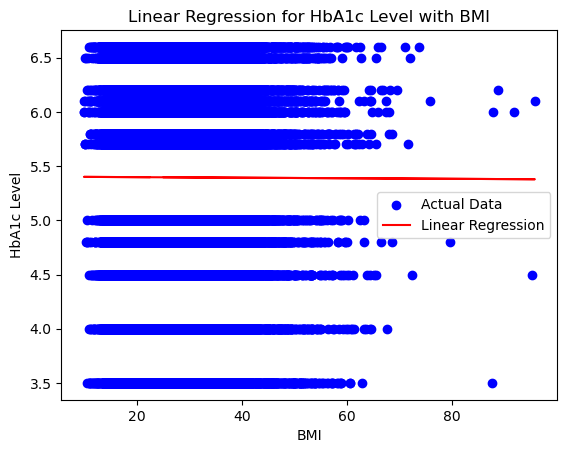

In [23]:
# Filter DataFrame to include only individuals diagnosed with diabetes
diabetes_negative_df = diabetes_df[diabetes_df['diabetes'] == 0]

# Extract features (X) and target variable (y)
X = diabetes_negative_df[['bmi']]
y = diabetes_negative_df['HbA1c_level']  # Only one target variable for linear regression

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Plot the actual data
plt.scatter(diabetes_negative_df['bmi'], diabetes_negative_df['HbA1c_level'], color='blue', label='Actual Data')

# Plot the regression line
plt.plot(diabetes_negative_df['bmi'], model.predict(X), color='red', label='Linear Regression')

# Set labels and title
plt.xlabel('BMI')
plt.ylabel('HbA1c Level')
plt.title('Linear Regression for HbA1c Level with BMI')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [24]:
# Conclusions about relationships between variables

In [ ]:
# t-tests
# Filter DataFrame to include individuals with diabetes (group 1) and without diabetes (group 2)
diabetes_positive_df = diabetes_df[diabetes_df['diabetes'] == 1]
diabetes_negative_df = diabetes_df[diabetes_df['diabetes'] == 0]

# Extract the relevant variable for the t-test
group1_data = diabetes_positive_df['blood_glucose_level']
group2_data = diabetes_negative_df['blood_glucose_level']

# Perform the t-test
t_statistic, p_value = ttest_ind(group1_data, group2_data)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 146.1610562407839
P-value: 0.0


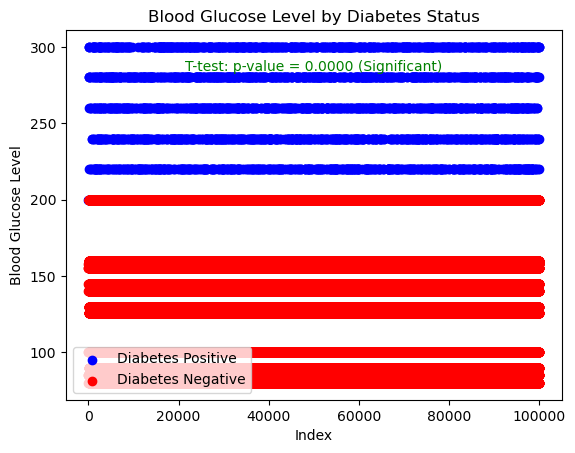

In [ ]:
# Filter DataFrame to include individuals with diabetes (group 1) and without diabetes (group 2)
diabetes_positive_df = diabetes_df[diabetes_df['diabetes'] == 1]
diabetes_negative_df = diabetes_df[diabetes_df['diabetes'] == 0]

# Extract the relevant variable for the scatter plot
group1_data = diabetes_positive_df['blood_glucose_level']
group2_data = diabetes_negative_df['blood_glucose_level']

# Perform the t-test
t_statistic, p_value = ttest_ind(group1_data, group2_data)

# Plot the data points for each group
plt.scatter(diabetes_positive_df.index, group1_data, color='blue', label='Diabetes Positive')
plt.scatter(diabetes_negative_df.index, group2_data, color='red', label='Diabetes Negative')

# Add legend
plt.legend(loc='lower left')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Blood Glucose Level')
plt.title('Blood Glucose Level by Diabetes Status')

# Add t-test result to the plot
if p_value < 0.05:  # If p-value is less than 0.05, highlight significant difference
    plt.text(0.5, 0.9, f'T-test: p-value = {p_value:.4f} (Significant)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, color='green', fontsize=10)
else:
    plt.text(0.5, 0.9, f'T-test: p-value = {p_value:.4f} (Not Significant)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, color='red', fontsize=10)

# Show the plot
plt.show()

In [ ]:
# t-tests
# 32 and up -average
# 31 and below - average

In [ ]:
# Age(x axis) vs diabetes

In [ ]:
# 1 t-test 32bmi vs the population


In [ ]:
# Anova Testing